# <span style="color:red">DATA ANALYSIS</span>
## <span style="color:red">Customer Interaction Data: Latest month, Latest day, Number of contacts, Latest duration, Passed days, Previous campaign outcome, Previous campaign's number</span>

In [17]:
df.head()

,Age,Type of job,Marital status,Education,Housing loan,Personal loan,Latest month,Latest day,Latest duration,Number of contacts,Passed days,Previous campaign's number,Previous campaign outcome,Label,Contact status,Age range,Latest duration range
0,56,housemaid,married,basic.4y,no,no,may,mon,261,1,-1,0,nonexistent,0,Never contacted,56-60,<06mins
1,57,services,married,high.school,no,no,may,mon,149,1,-1,0,nonexistent,0,Never contacted,56-60,<06mins
2,37,services,married,high.school,yes,no,may,mon,226,1,-1,0,nonexistent,0,Never contacted,36-40,<06mins
3,40,admin.,married,basic.6y,no,no,may,mon,151,1,-1,0,nonexistent,0,Never contacted,36-40,<06mins
4,56,services,married,high.school,no,yes,may,mon,307,1,-1,0,nonexistent,0,Never contacted,56-60,06-10mins


In [18]:
df['Label'].value_counts()

Label
0    33977
1     4257
Name: count, dtype: Int64

In [19]:
count_label = pd.DataFrame({'Label': ['Label_Yes', 'Label_No'], 
                           'Count': [df[df['Label'] == 1].shape[0], df[df['Label'] == 0].shape[0]],
                           'Percentage': [f"{round(df[df['Label'] == 1].shape[0] / df.shape[0] * 100, 2)}%", 
                                         f"{round(df[df['Label'] == 0].shape[0] / df.shape[0] * 100, 2)}%"]})
count_label.set_index('Label', inplace=True)

count_label

,Count,Percentage
Label,,
Label_Yes,4257,11.13%
Label_No,33977,88.87%


In [20]:
df_yes = df[df['Label'] == 1]
df_no = df[df['Label'] == 0]

## <span style="color:blue">Customer Interaction Data: Latest month, Latest day, Number of contacts, Latest duration, Passed days, Previous campaign outcome, Previous campaign's number</span>

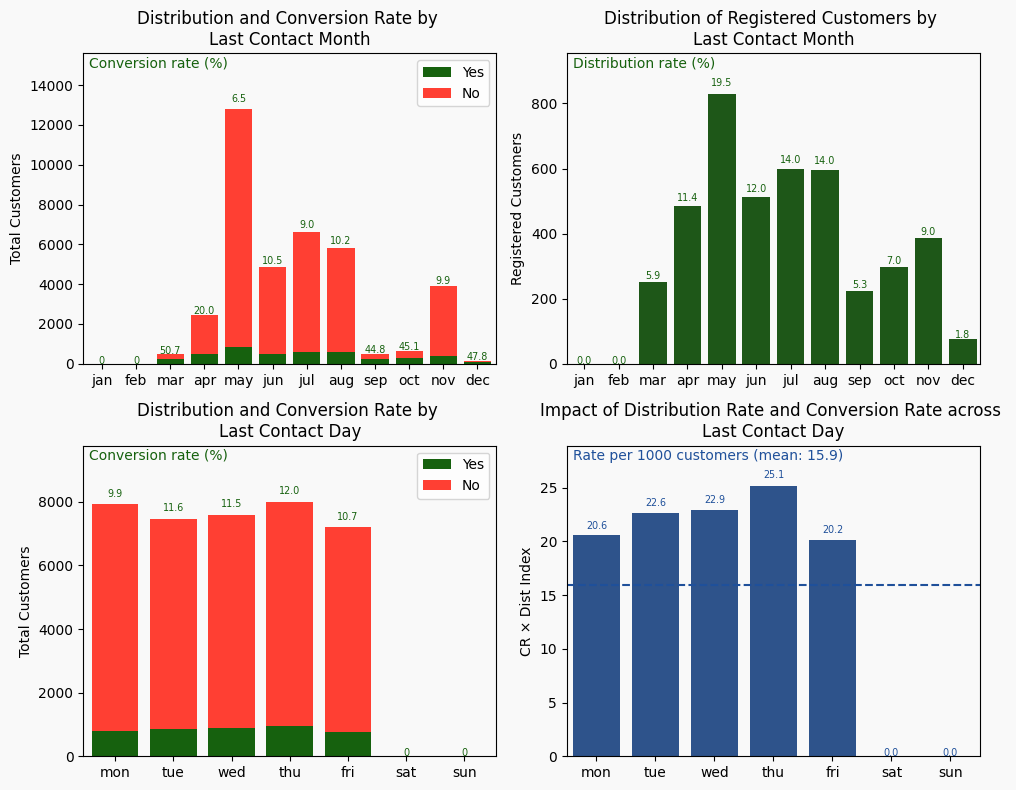

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

stackedbarorder(axes[0, 0], df_yes, df_no, 'Latest month', 'month', "\nLast Contact Month")
barorderdist(axes[0, 1], df_yes, 'Latest month', 'month', "\nLast Contact Month")

stackedbarorder(axes[1, 0], df_yes, df_no, 'Latest day', 'day', "\nLast Contact Day")
barordercrdist(axes[1, 1], df_yes, df_no, 'Latest day', 'day', "\nLast Contact Day")

plt.tight_layout()
plt.show()

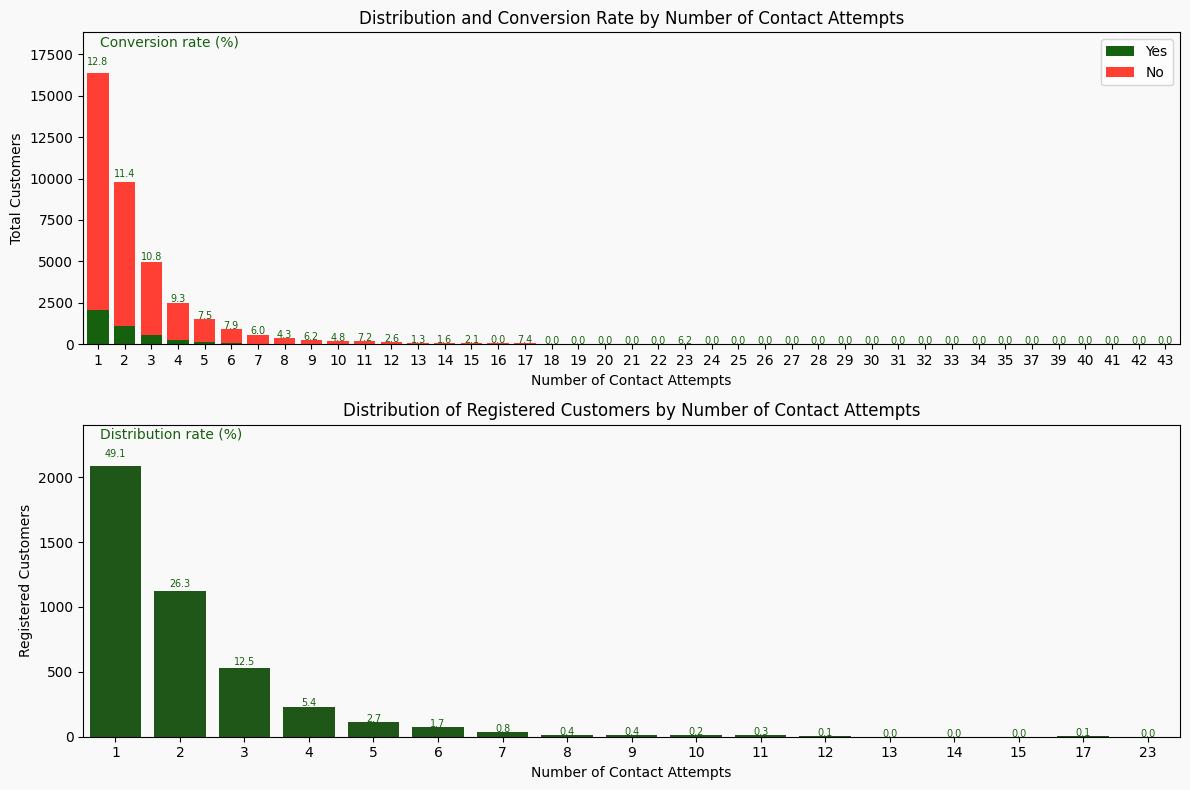

In [36]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

stackedbar(axes[0], df_yes, df_no, "Number of contacts", "Number of Contact Attempts")
bardist(axes[1], df_yes, "Number of contacts", 'Number of Contact Attempts')
axes[0].set_xlabel("Number of Contact Attempts")
axes[1].set_xlabel("Number of Contact Attempts")

plt.tight_layout()
plt.show()

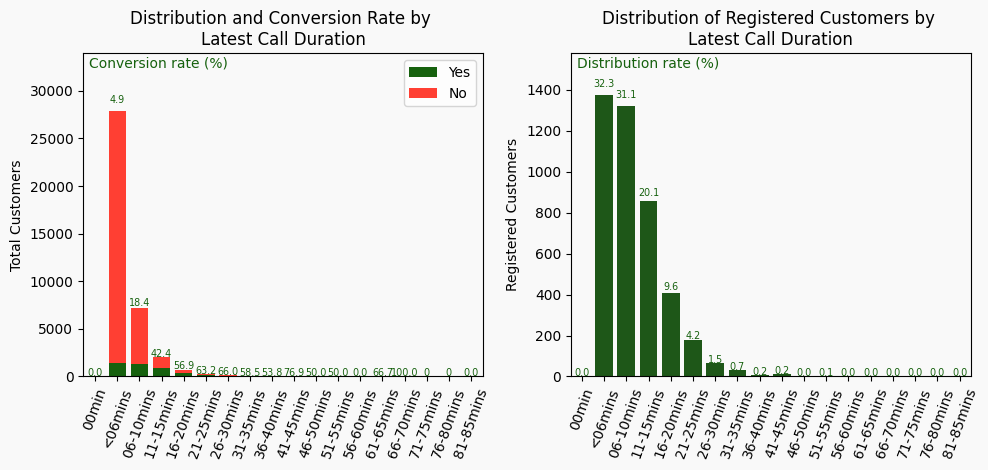

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4.8))

stackedbarorder(axes[0], df_yes, df_no, "Latest duration range", 'duration', "\nLatest Call Duration")
barorderdist(axes[1], df_yes, "Latest duration range", 'duration', '\nLatest Call Duration')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=70)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=70)

plt.tight_layout()
plt.show()

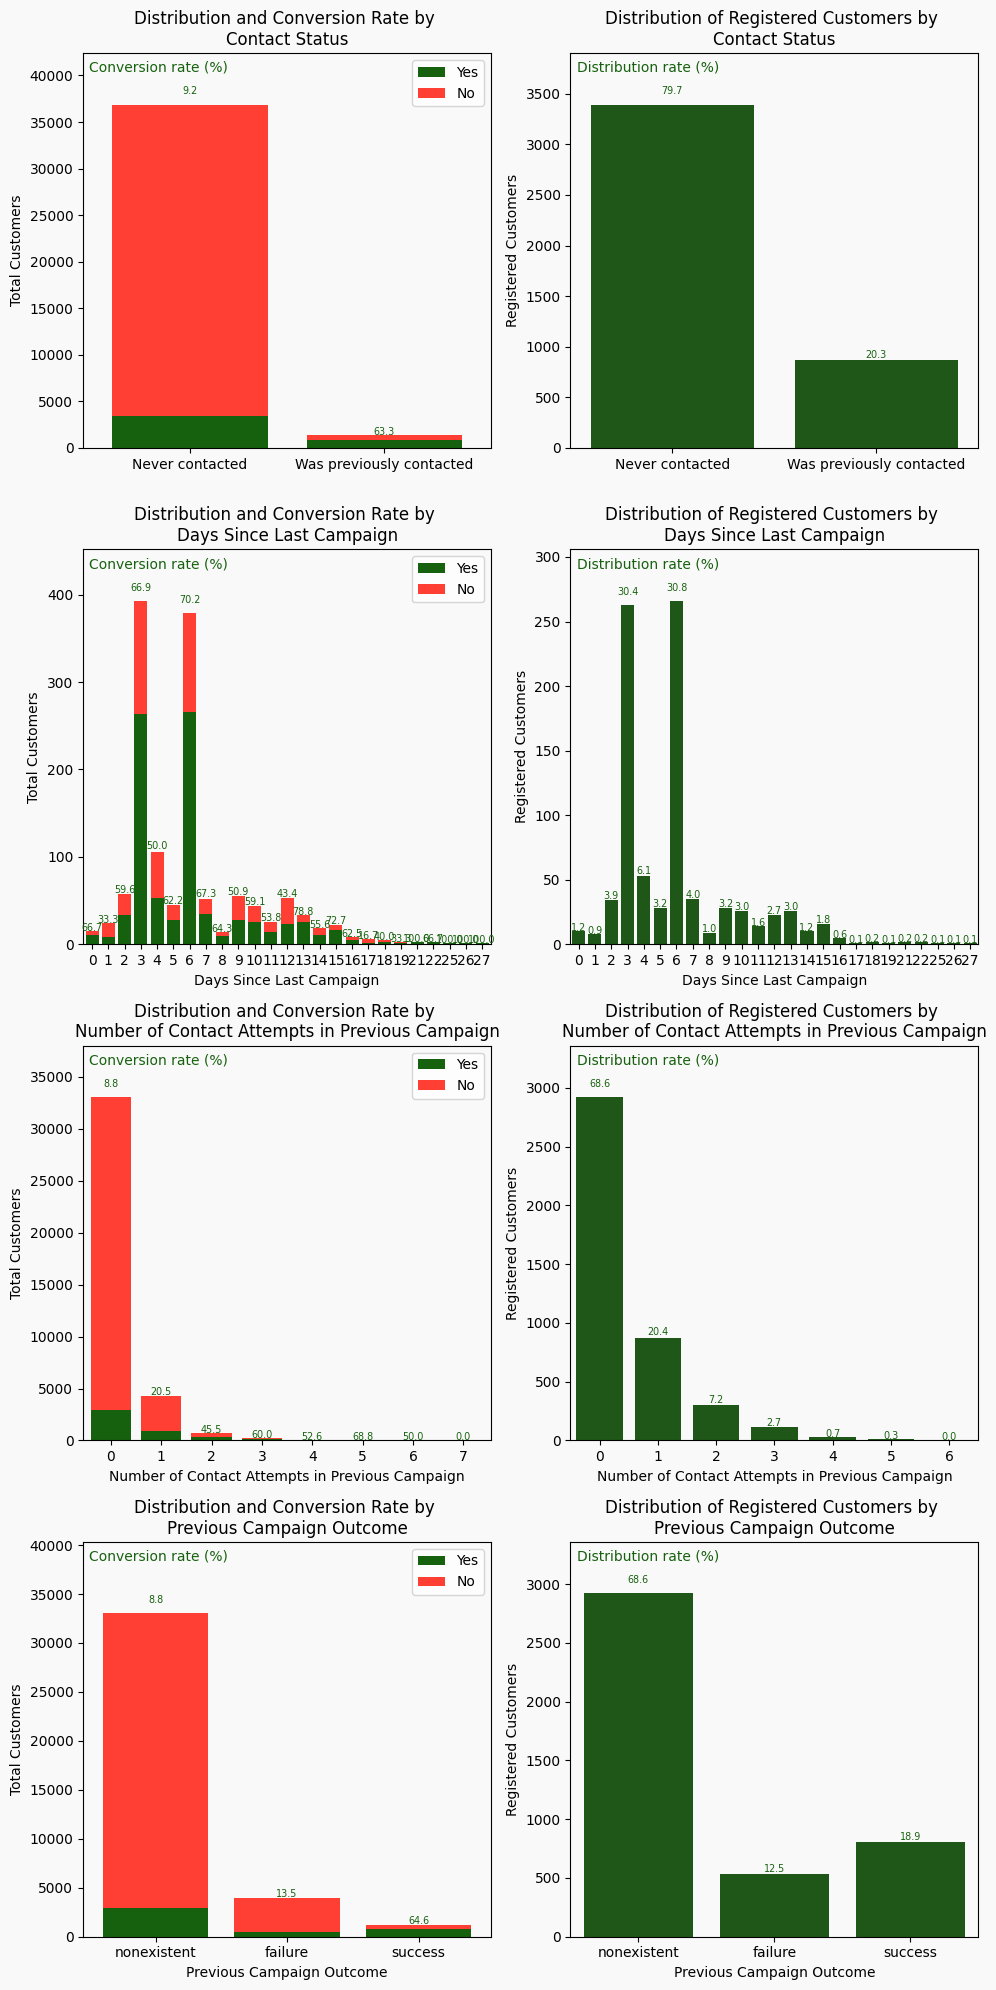

In [38]:
fig, axes = plt.subplots(4, 2, figsize=(10, 20))

stackedbar(axes[0, 0], df_yes, df_no, "Contact status", "\nContact Status")
bardist(axes[0, 1], df_yes, "Contact status", '\nContact Status')

stackedbar(axes[1, 0], df_yes[df_yes['Passed days'] > -1], df_no[df_no['Passed days'] > -1], "Passed days", "\nDays Since Last Campaign")
bardist(axes[1, 1], df_yes[df_yes['Passed days'] > -1], "Passed days", '\nDays Since Last Campaign')
axes[1, 0].set_xlabel("Days Since Last Campaign")
axes[1, 1].set_xlabel("Days Since Last Campaign")

stackedbar(axes[2, 0], df_yes, df_no, "Previous campaign's number", "\nNumber of Contact Attempts in Previous Campaign")
bardist(axes[2, 1], df_yes, "Previous campaign's number", "\nNumber of Contact Attempts in Previous Campaign")
axes[2, 0].set_xlabel("Number of Contact Attempts in Previous Campaign")
axes[2, 1].set_xlabel("Number of Contact Attempts in Previous Campaign")

stackedbarorder(axes[3, 0], df_yes, df_no, "Previous campaign outcome", 'desc order', "\nPrevious Campaign Outcome")
barorderdist(axes[3, 1], df_yes, "Previous campaign outcome", 'desc order', "\nPrevious Campaign Outcome")
axes[3, 0].set_xlabel("Previous Campaign Outcome")
axes[3, 1].set_xlabel("Previous Campaign Outcome")

plt.tight_layout()
plt.show()